<a href="https://colab.research.google.com/github/JonathanLehner/Colab-collection/blob/master/python_render_obj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Python 2

In [3]:
import os
os.environ["PYOPENGL_PLATFORM"] = "egl" #opengl seems to only work with TPU
!PYOPENGL_PLATFORM=egl python -c "from OpenGL import EGL"
print(os.environ['PYOPENGL_PLATFORM']) 


egl


In [4]:
# https://github.com/eduble/gl
'''!apt install libgl1-mesa-dri libegl1-mesa libgbm1
!pip install wheel
!pip install numpy
!pip install Cython
!git clone https://github.com/mcfletch/pyopengl.git
%cd pyopengl
!python setup.py develop
%cd accelerate
!python setup.py develop
%cd /content/'''

!pip install transforms3d

     |████████████████████████████████| 71kB 23.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/3d/3c/84/28d36677f3c760c048bd02b5a547ea0c4027770cc9cdb9af1e
Successfully built transforms3d


In [5]:
import OpenGL.GL as gl
print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 


None
None


In [6]:
# Install pyrender
!pip install pyrender

     |████████████████████████████████| 1.2MB 29.7MB/s 
     |████████████████████████████████| 1.0MB 33.0MB/s 
     |████████████████████████████████| 890kB 44.1MB/s 
     |████████████████████████████████| 1.7MB 44.8MB/s 
     |████████████████████████████████| 327kB 39.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Stored in directory: /root/.cache/pip/wheels/7b/13/30/a40a0fb2c4d14222550ee97cdf147bf3993e161162b33f8954
Successfully built networkx trimesh
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: pyglet 1.3.2
    Uninstalling pyglet-1.3.2:
      Successfully uninstalled pyglet-1.3.2
  Found existing installation: networkx 2.3
    Uninstalling networkx-2.3:
      Successfully uninstalled networkx-2.3


In [0]:
import pyrender
import os
import numpy as np
import trimesh
import pyrender
import transforms3d
import OpenGL.GL as gl


In [8]:
!pwd
  

/content


/content
False
faceid: 89 - vertices: [111 516 116]
faceid: 215 - vertices: [680 179 104]
faceid: 357 - vertices: [196 774 108]
faceid: 378 - vertices: [196 108 483]
in list 196
in list 108
faceid: 91 - vertices: [516 160 366]
in list 516
faceid: 272 - vertices: [366 160 526]
in list 366
in list 160
faceid: 59 - vertices: [371 483 104]
in list 483
in list 104
faceid: 1521 - vertices: [372  20 239]
faceid: 87 - vertices: [435 116 774]
in list 116
in list 774
faceid: 1527 - vertices: [472 161 503]
faceid: 221 - vertices: [496 176 680]
in list 680
faceid: 47 - vertices: [506 239 697]
in list 239
faceid: 1529 - vertices: [508 496 161]
in list 496
in list 161
faceid: 1525 - vertices: [556 503 449]
in list 503
faceid: 77 - vertices: [617 697 526]
in list 697
in list 526
faceid: 1523 - vertices: [747 449  20]
in list 449
in list 20
[196, 108, 516, 366, 160, 483, 104, 116, 774, 680, 239, 496, 161, 503, 697, 526, 449, 20]
False


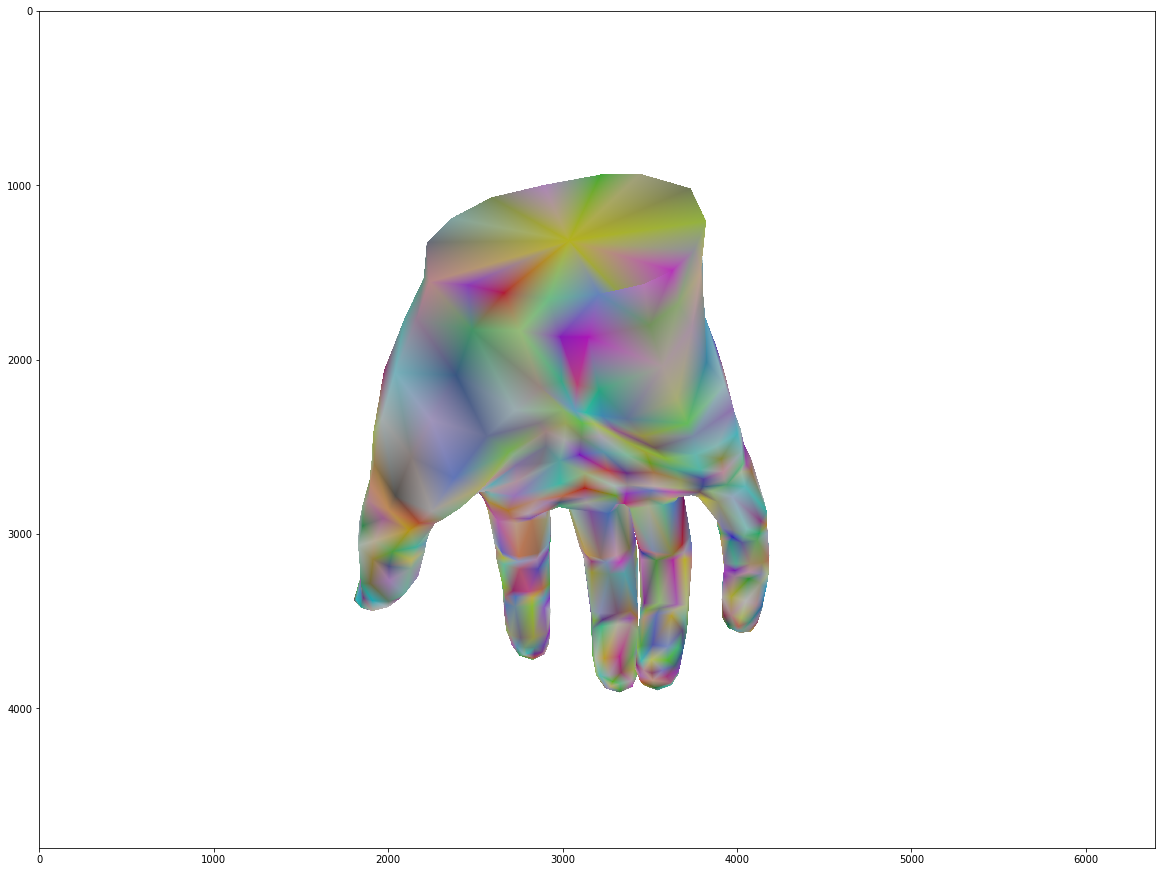

In [19]:
%cd /content/
# download hand model
import os
import numpy as np
if os.path.exists('hand_mesh_no_mtl.obj') == False:
  !wget https://github.com/JonathanLehner/Colab-collection/releases/download/MANO/hand_mesh_no_mtl.obj
# Load the hand trimesh and put it in a scene
hand_trimesh = trimesh.load('hand_mesh_no_mtl.obj') # be careful about the filename "with 1" on Github
print(hand_trimesh.is_watertight)

#hand_trimesh.visual.face_colors = np.random.uniform(size=hand_trimesh.faces.shape)
# https://trimsh.org/trimesh.html?highlight=hole#trimesh.repair.fill_holes
broken_faces = trimesh.repair.broken_faces(hand_trimesh, color=None) # color not working (0.2,0.2,0.1,1.0)
vertices = hand_trimesh.vertices
faces = hand_trimesh.faces
potential_edge_vertices_ids = []
edge_vertices_ids = []
# if we have a closed path of triangles then we can see that the vertices 
# at the edge are those that are part of two of the triangles
for face_id in broken_faces:
    tri_vertices = faces[face_id]
    print("faceid: {0} - vertices: {1}".format(face_id, tri_vertices))

    for vertex in tri_vertices:
        #dist = numpy.linalg.norm(a-b)
        #print(potential_edge_vertices_ids)
        if(vertex in potential_edge_vertices_ids):
             print("in list {0}".format(vertex))
             edge_vertices_ids.append(vertex)
        else:
             potential_edge_vertices_ids.append(vertex)
    
   
 
print(edge_vertices_ids)
# found by examining the model
edge_vertices_ids = [108, 774, 116, 516, 160, 526, 697, 239, 20, 449, 503, 161, 496, 680, 104, 483]
#print(potential_edge_vertices_ids)
# find center of edge vertices
edge_vertices = np.take(vertices, edge_vertices_ids, axis=0)
#print(edge_vertices)
centroid = edge_vertices.mean(axis=0)
#print(centroid)
centroid_id = len(vertices)
num_vertices = len(edge_vertices_ids)
vertices = np.append(vertices,[centroid],axis=0)
#print("faces before")
#print(faces)
for num, edge_vertex_id in enumerate(edge_vertices_ids, start=0):
      next_vertex = (num + 1) % num_vertices
      #print("{0} {1} {2}".format(centroid_id, edge_vertex_id, edge_vertices_ids[next_vertex]))
      new_face = [centroid_id, edge_vertex_id, edge_vertices_ids[next_vertex]]
      #print(new_face)
      faces = np.append(faces,[new_face],axis=0)
      #print(faces)

#print("faces")
#print(faces)
#print("hand trimesh faces")
#print(hand_trimesh.faces)
# print(vertices)
# print(hand_trimesh.vertices)
hand_trimesh.vertices = vertices
hand_trimesh.faces = faces

vertex_colors = np.random.uniform(size=hand_trimesh.vertices.shape)
hand_trimesh.visual.vertex_colors = vertex_colors

# test again
print(hand_trimesh.is_watertight)

hand_mesh = pyrender.Mesh.from_trimesh(hand_trimesh, smooth=False) #, material
hand_node = pyrender.Node(mesh=hand_mesh)

scene = pyrender.Scene(ambient_light=np.array([1.7, 1.7, 1.7, 1.0]), bg_color=[1.0, 1.0, 1.0, 0.0])
scene.add_node(hand_node)

from matplotlib import pyplot as plt

# Set up the camera -- z-axis away from the scene, x-axis right, y-axis up
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0)

# look at the hand from a certain distance
# rotate to view the hand from a different angle

rotation = transforms3d.euler.euler2mat(np.pi/1.5, np.pi/2, np.pi/2, axes='sxyz') # in tutorial matrix it is np.pi/4, 0, np.pi/2,

# translations
T = [[1.0, 0.0, 0.0, 0.0],
     [0.0, 1.0, 0.0, 0.0],
     [0.0, 0.0, 1.0, 200.0],
     [0.0, 0.0, 0.0, 1.0]]
Z = [1.0, 1.0, 1.0] # zooms
B = transforms3d.affines.compose([45.0, 0.0, 0.0], rotation, Z) # applies translation last
camera_pose = np.matmul(B, T)

scene.add(camera, pose=camera_pose)

# Set up the light -- a single spot light in the same spot as the camera
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                               innerConeAngle=np.pi/16.0)
scene.add(light, pose=camera_pose)

# Render the scene
r = pyrender.OffscreenRenderer(viewport_width=640*10, viewport_height=480*10)
flags = pyrender.RenderFlags.RGBA | pyrender.RenderFlags.OFFSCREEN
color, depth = r.render(scene, flags=flags)
r.delete()

plt.figure(figsize=(20,20))
plt.axis('on')
plt.imshow(color)
plt.show()

In [0]:
# download background images dataset
# !wget http://groups.csail.mit.edu/vision/datasets/ADE20K/ADE20K_2016_07_26.zip
# !unzip ADE20K_2016_07_26.zip

plt.figure(figsize=(20,20))
plt.axis('on')
plt.imshow(color)
plt.show()

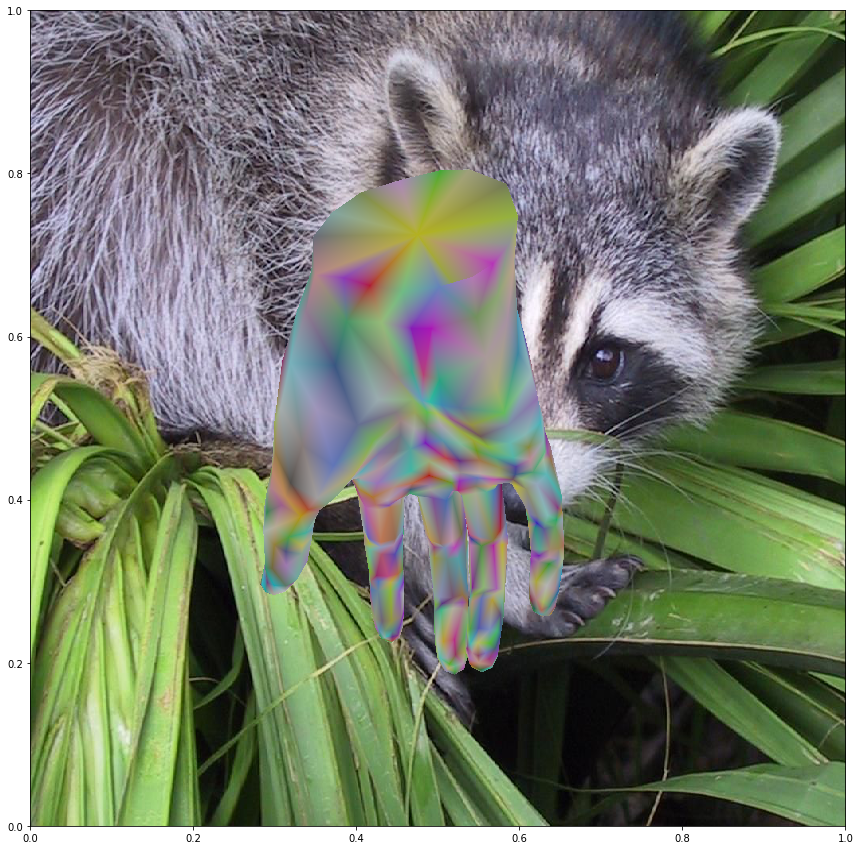

In [20]:
# show rendered hand in front of a random background image
# source: https://stackoverflow.com/questions/34495817/plotting-a-background-image-to-a-matplotlib-graph
from matplotlib import pyplot as plt
from scipy.misc import face
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15) )
plt.axis('on')

background = ax.imshow(face(), cmap=plt.cm.gray, extent=[0, 1, 0, 1])
image = ax.imshow(color, extent=[0, 1, 0, 1])

plt.show()